### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as s

### Global Variables

In [2]:
bins=np.array([40, 50,60,70,80,90,100])

### Importing Data

In [3]:
bse_fa21 = pd.read_csv('assets/bse_fa21.csv', index_col=0)

bse_fa22 = pd.read_csv('assets/bse_fa22.csv', index_col=0)

bcs_sp22 = pd.read_csv('assets/bcs_sp22.csv', index_col=0)

bcs_fa21 = pd.read_csv('assets/bcs_fa21.csv', index_col=0)


In [4]:
bcs_fa21['BATCH'] = 'bcs_fa21'
bcs_sp22['BATCH'] = 'bcs_sp22'
bse_fa21['BATCH'] = 'bse_fa21'
bse_fa22['BATCH'] = 'bse_fa22'


### Combining All Classes

In [5]:
all_classes = bcs_sp22.append([bcs_fa21, bse_fa22, bse_fa21], ignore_index=True)
uncleaned_all_classes = pd.DataFrame(all_classes)

### Data Cleaning

In [6]:
all_classes = all_classes[all_classes['TOTAL'] >= 40]
all_classes['QUIZ_PERCENT'] = (all_classes['QUIZ'] / 15) * 100
all_classes['ASSIGN_PERCENT'] = (all_classes['ASSIGN'] / 10) * 100
all_classes['MID_PERCENT'] = (all_classes['MID'] / 25) * 100
all_classes['FINAL_PERCENT'] = (all_classes['FINAL'] / 50) * 100

### Data Visualization for All Classes
* Histogram
* Frequency Curve
* Multiple Bar Chart
* Component Bar Chart
* Pie Chart

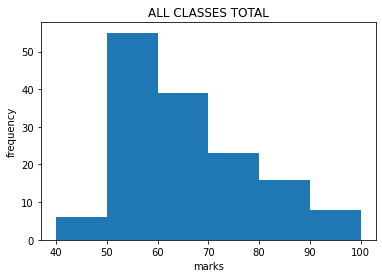

In [34]:
plt.hist(all_classes['TOTAL'], bins=bins)
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title("ALL CLASSES TOTAL")
plt.xticks(bins)
plt.show()

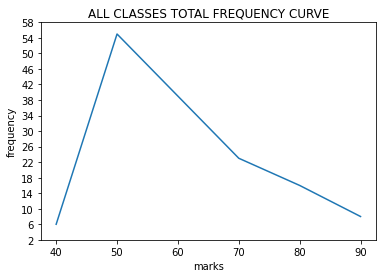

In [35]:

plt.plot(bins[:-1], all_classes['TOTAL'].value_counts(bins=bins - 1).sort_index())
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title('ALL CLASSES TOTAL FREQUENCY CURVE')
plt.xticks(bins[:-1])
plt.yticks(np.arange(2, 60, 4))
plt.show()

array([[<AxesSubplot:title={'center':'QUIZ_PERCENT'}>,
        <AxesSubplot:title={'center':'ASSIGN_PERCENT'}>],
       [<AxesSubplot:title={'center':'MID_PERCENT'}>,
        <AxesSubplot:title={'center':'FINAL_PERCENT'}>],
       [<AxesSubplot:title={'center':'TOTAL'}>, <AxesSubplot:>]],
      dtype=object)

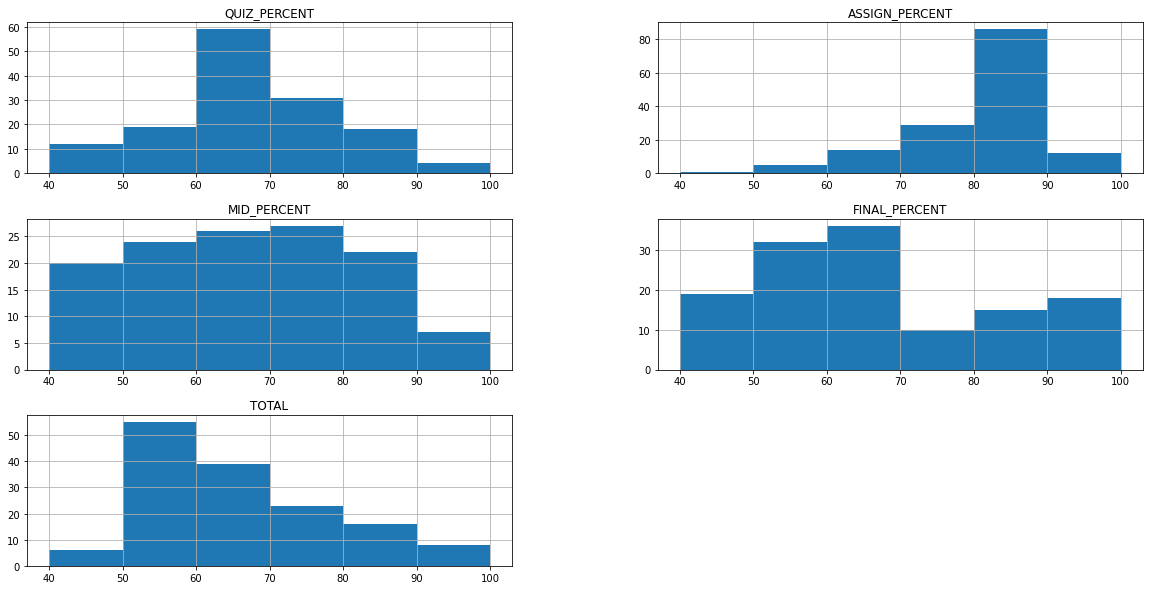

In [9]:
all_classes.hist(column=['QUIZ_PERCENT', 'ASSIGN_PERCENT', 'MID_PERCENT', 'FINAL_PERCENT', 'TOTAL'], figsize=(20, 10), bins=bins)

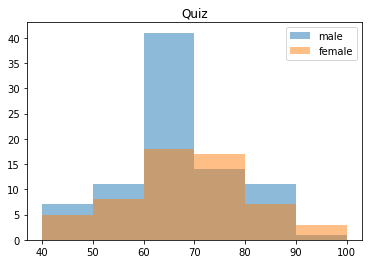

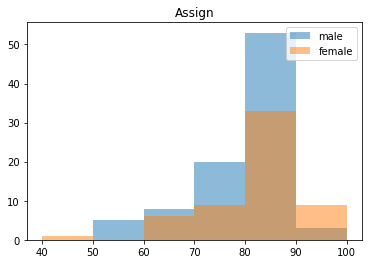

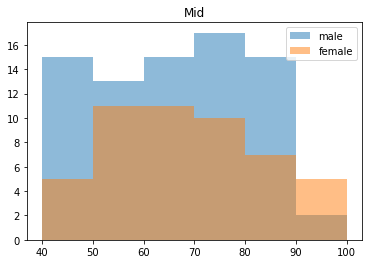

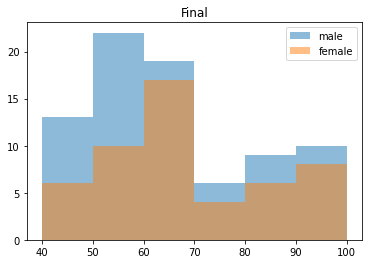

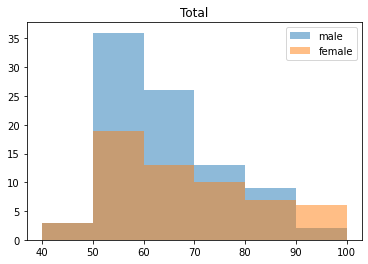

In [26]:
all_classes_m = all_classes[all_classes['GENDER'] == 'M']
all_classes_f = all_classes[all_classes['GENDER'] == 'F']
plt.hist(all_classes_m['QUIZ_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(all_classes_f['QUIZ_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Quiz')
plt.legend(loc='upper right')
plt.show()

plt.hist(all_classes_m['ASSIGN_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(all_classes_f['ASSIGN_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Assign')
plt.legend(loc='upper right')
plt.show()

plt.hist(all_classes_m['MID_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(all_classes_f['MID_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Mid')
plt.legend(loc='upper right')
plt.show()

plt.hist(all_classes_m['FINAL_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(all_classes_f['FINAL_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Final')
plt.legend(loc='upper right')
plt.show()

plt.hist(all_classes_m['TOTAL'], bins=bins, alpha=0.5, label='male')
plt.hist(all_classes_f['TOTAL'], bins=bins, alpha=0.5, label='female')
plt.title('Total')
plt.legend(loc='upper right')
plt.show()

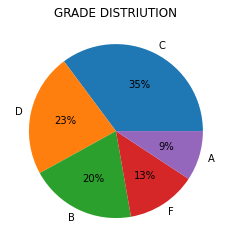

In [27]:
plt.pie(uncleaned_all_classes["LG"].str[0].value_counts(), labels=uncleaned_all_classes["LG"].str[0].value_counts().keys(), autopct='%.0f%%')
plt.title('GRADE DISTRIUTION')
plt.show()

<AxesSubplot:xlabel='BATCH'>

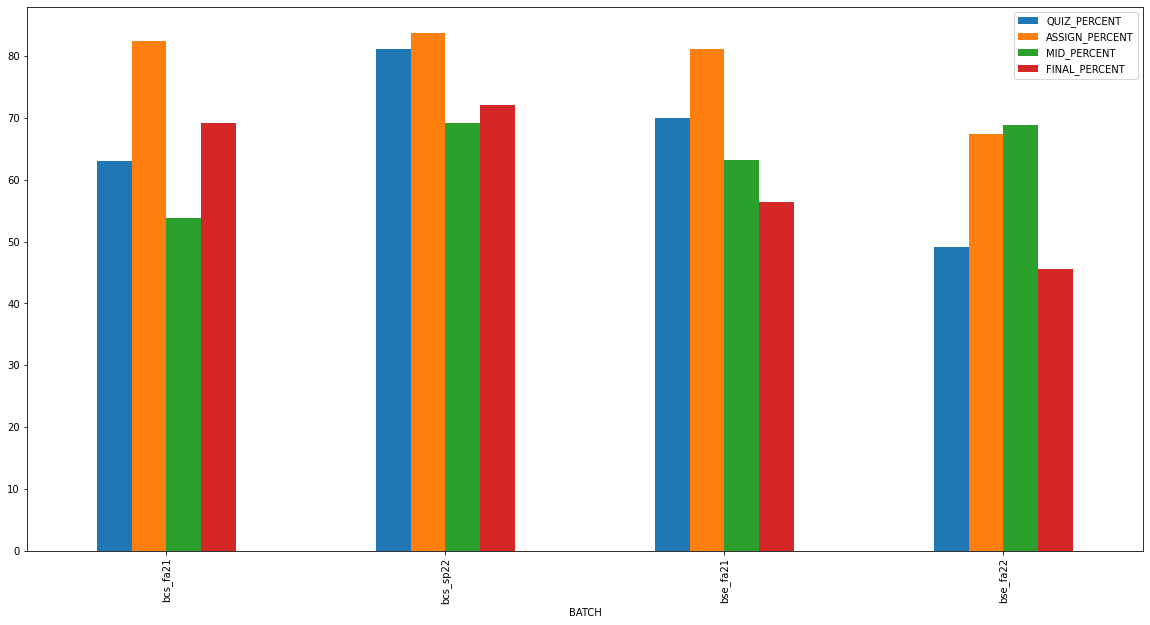

In [28]:
all_classes.pivot_table(index='BATCH', values=['QUIZ_PERCENT', 'ASSIGN_PERCENT', 'MID_PERCENT', 'FINAL_PERCENT']).reset_index().plot(x='BATCH', y=['QUIZ_PERCENT', 'ASSIGN_PERCENT', 'MID_PERCENT', 'FINAL_PERCENT'], figsize=(20, 10), kind='bar')

<AxesSubplot:xlabel='BATCH'>

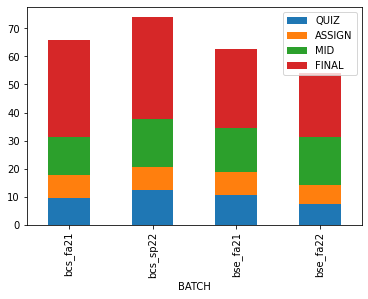

In [29]:
all_classes.pivot_table(index='BATCH', values=['QUIZ', 'ASSIGN', 'MID', 'FINAL']).reset_index().plot(x='BATCH', y=['QUIZ', 'ASSIGN', 'MID', 'FINAL'], kind='bar', stacked=True)

In [46]:
a_mean_all = all_classes.pivot_table(index='BATCH', values=['QUIZ_PERCENT', 'ASSIGN_PERCENT', 'MID_PERCENT', 'FINAL_PERCENT'], margins=True, margins_name='Airthmetic Mean', aggfunc=s.mean)
a_mean_all['Airthmetic Mean'] = a_mean_all.loc[:, 'ASSIGN_PERCENT': 'QUIZ_PERCENT'].aggregate(s.mean, axis=1)
a_mean_all

,ASSIGN_PERCENT,FINAL_PERCENT,MID_PERCENT,QUIZ_PERCENT,Airthmetic Mean
BATCH,,,,,
bcs_fa21,82.419355,69.145161,53.838710,63.096774,67.125000
bcs_sp22,83.769231,72.138462,69.230769,81.153846,76.573077
bse_fa21,81.090909,56.442424,63.151515,69.919192,67.651010
bse_fa22,67.346154,45.623077,68.923077,49.051282,57.735897
Airthmetic Mean,79.693878,62.662585,61.319728,65.337868,67.253515


In [47]:
h_mean_all = all_classes.pivot_table(index='BATCH', values=['QUIZ_PERCENT', 'ASSIGN_PERCENT', 'MID_PERCENT', 'FINAL_PERCENT'], margins=True, margins_name='Harmonic Mean', aggfunc=s.harmonic_mean)
h_mean_all['Harmonic Mean'] = a_mean_all.loc[:, 'ASSIGN_PERCENT': 'QUIZ_PERCENT'].aggregate(s.harmonic_mean, axis=1)
h_mean_all

,ASSIGN_PERCENT,FINAL_PERCENT,MID_PERCENT,QUIZ_PERCENT,Harmonic Mean
BATCH,,,,,
bcs_fa21,82.042581,65.177357,48.916130,62.509845,65.554354
bcs_sp22,83.424992,66.097076,61.534801,80.082777,76.094080
bse_fa21,79.570366,53.306752,56.454883,69.313346,66.460456
bse_fa22,66.300815,42.684764,65.888174,46.655969,55.816696
Harmonic Mean,78.431722,57.136491,55.073790,62.556460,NaN


In [48]:
g_mean_all = all_classes.pivot_table(index='BATCH', values=['QUIZ_PERCENT', 'ASSIGN_PERCENT', 'MID_PERCENT', 'FINAL_PERCENT'], margins=True, margins_name='Geometric Mean', aggfunc=s.geometric_mean)
g_mean_all['Geometric Mean'] = a_mean_all.loc[:, 'ASSIGN_PERCENT': 'QUIZ_PERCENT'].aggregate(s.geometric_mean, axis=1)
g_mean_all

,ASSIGN_PERCENT,FINAL_PERCENT,MID_PERCENT,QUIZ_PERCENT,Geometric Mean
BATCH,,,,,
bcs_fa21,82.236985,67.146298,51.432777,62.806512,66.332017
bcs_sp22,83.597497,69.197561,65.771367,80.670761,76.333455
bse_fa21,80.403847,54.851678,59.926664,69.611341,67.048567
bse_fa22,66.847238,44.012197,67.511547,47.847135,56.771203
Geometric Mean,79.106880,59.864500,58.334577,64.027221,NaN


In [50]:
std_all = all_classes.pivot_table(index='BATCH', values=['QUIZ_PERCENT', 'ASSIGN_PERCENT', 'MID_PERCENT', 'FINAL_PERCENT'], margins=True, margins_name='Standard Deviation', aggfunc=s.stdev)
std_all['Standard Deviation'] = std_all.loc[:, 'ASSIGN_PERCENT': 'QUIZ_PERCENT'].aggregate(s.stdev, axis=1)
std_all

,ASSIGN_PERCENT,FINAL_PERCENT,MID_PERCENT,QUIZ_PERCENT,Standard Deviation
BATCH,,,,,
bcs_fa21,5.363961,16.889930,15.824026,6.051505,6.170112
bcs_sp22,5.457528,20.327618,20.136152,8.270016,7.803414
bse_fa21,9.776770,14.058250,19.455271,6.765430,5.510730
bse_fa22,7.999712,13.703293,13.305407,11.160523,2.612414
Standard Deviation,9.095846,18.965792,18.256163,12.531239,4.724149


### Data Visualization for BCS FA21
* Histogram
* Frequency Curve
* Multiple Bar Chart
* Component Bar Chart
* Pie Chart

In [43]:
bcs_fa21 = all_classes[all_classes['BATCH'] == 'bcs_fa21']
uncleaned_bcs_fa21 = uncleaned_all_classes[uncleaned_all_classes['BATCH'] == 'bcs_fa21']

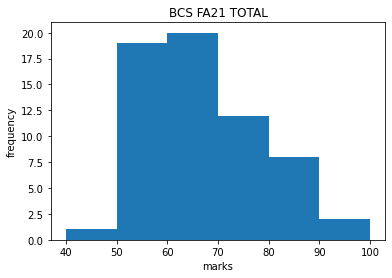

In [36]:
plt.hist(bcs_fa21['TOTAL'], bins=bins)
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title("BCS FA21 TOTAL")
plt.xticks(bins)
plt.show()

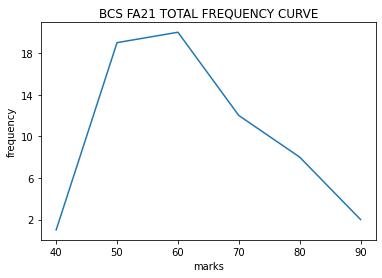

In [40]:

plt.plot(bins[:-1], bcs_fa21['TOTAL'].value_counts(bins=bins - 1).sort_index())
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title('BCS FA21 TOTAL FREQUENCY CURVE')
plt.xticks(bins[:-1])
plt.yticks(np.arange(2, 22, 4))
plt.show()

array([[<AxesSubplot:title={'center':'QUIZ_PERCENT'}>,
        <AxesSubplot:title={'center':'ASSIGN_PERCENT'}>],
       [<AxesSubplot:title={'center':'MID_PERCENT'}>,
        <AxesSubplot:title={'center':'FINAL_PERCENT'}>],
       [<AxesSubplot:title={'center':'TOTAL'}>, <AxesSubplot:>]],
      dtype=object)

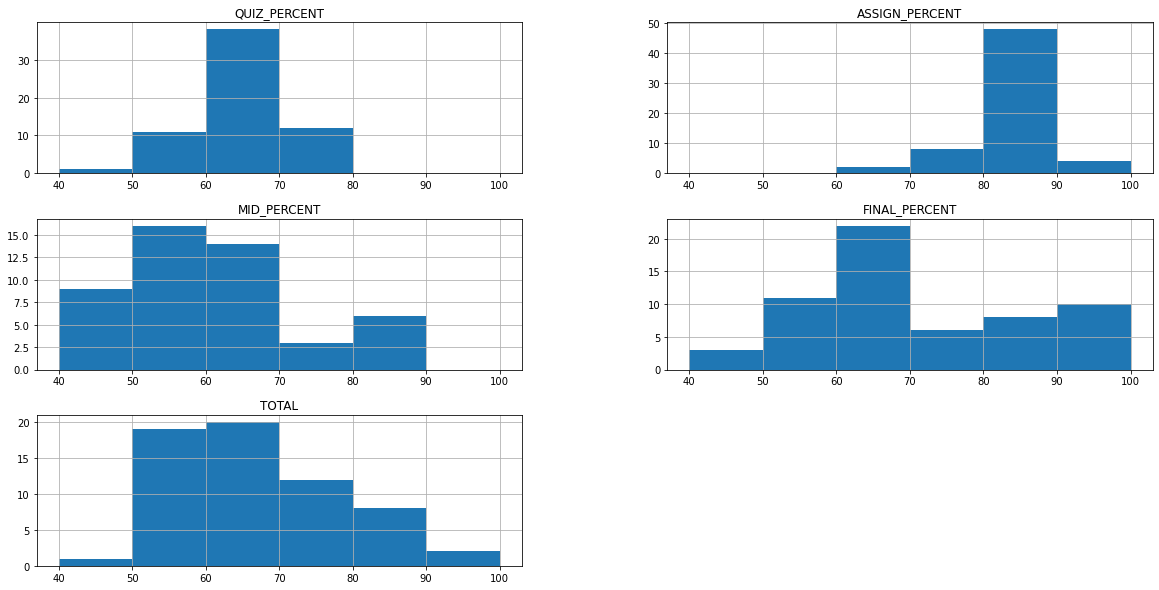

In [41]:
bcs_fa21.hist(column=['QUIZ_PERCENT', 'ASSIGN_PERCENT', 'MID_PERCENT', 'FINAL_PERCENT', 'TOTAL'], figsize=(20, 10), bins=bins)

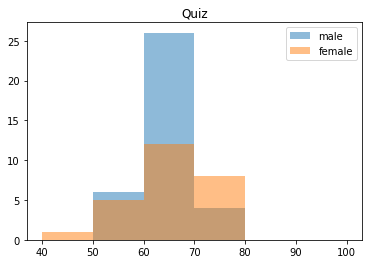

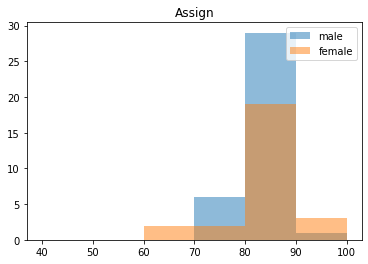

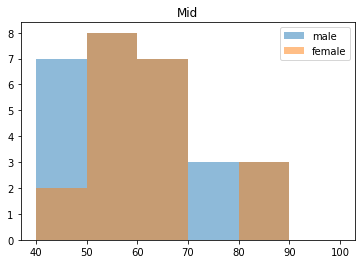

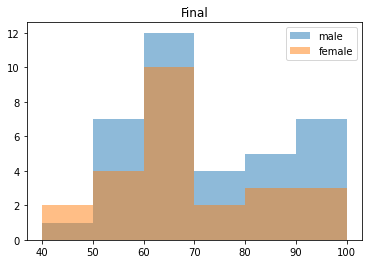

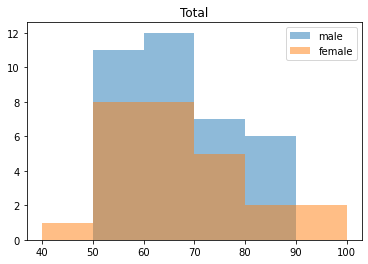

In [42]:
bcs_fa21_m = bcs_fa21[bcs_fa21['GENDER'] == 'M']
bcs_fa21_f = bcs_fa21[bcs_fa21['GENDER'] == 'F']
plt.hist(bcs_fa21_m['QUIZ_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bcs_fa21_f['QUIZ_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Quiz')
plt.legend(loc='upper right')
plt.show()

plt.hist(bcs_fa21_m['ASSIGN_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bcs_fa21_f['ASSIGN_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Assign')
plt.legend(loc='upper right')
plt.show()

plt.hist(bcs_fa21_m['MID_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bcs_fa21_f['MID_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Mid')
plt.legend(loc='upper right')
plt.show()

plt.hist(bcs_fa21_m['FINAL_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bcs_fa21_f['FINAL_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Final')
plt.legend(loc='upper right')
plt.show()

plt.hist(bcs_fa21_m['TOTAL'], bins=bins, alpha=0.5, label='male')
plt.hist(bcs_fa21_f['TOTAL'], bins=bins, alpha=0.5, label='female')
plt.title('Total')
plt.legend(loc='upper right')
plt.show()

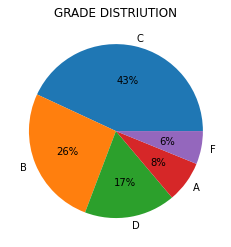

In [44]:
plt.pie(uncleaned_bcs_fa21["LG"].str[0].value_counts(), labels=uncleaned_bcs_fa21["LG"].str[0].value_counts().keys(), autopct='%.0f%%')
plt.title('GRADE DISTRIUTION')
plt.show()

### Data Visualization for BCS SP22
* Histogram
* Frequency Curve
* Multiple Bar Chart
* Component Bar Chart
* Pie Chart

In [51]:
bcs_sp22 = all_classes[all_classes['BATCH'] == 'bcs_sp22']
uncleaned_bcs_sp22 = uncleaned_all_classes[uncleaned_all_classes['BATCH'] == 'bcs_sp22']

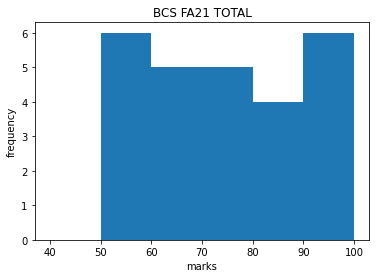

In [53]:
plt.hist(bcs_sp22['TOTAL'], bins=bins)
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title("BCS FA21 TOTAL")
plt.xticks(bins)
plt.show()

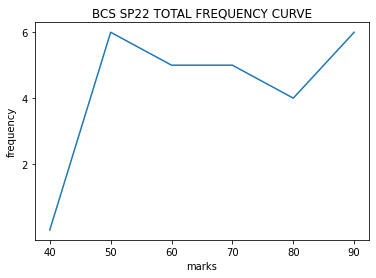

In [55]:
plt.plot(bins[:-1], bcs_sp22['TOTAL'].value_counts(bins=bins - 1).sort_index())
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title('BCS SP22 TOTAL FREQUENCY CURVE')
plt.xticks(bins[:-1])
plt.yticks(np.arange(2, 8, 2))
plt.show()

array([[<AxesSubplot:title={'center':'QUIZ_PERCENT'}>,
        <AxesSubplot:title={'center':'ASSIGN_PERCENT'}>],
       [<AxesSubplot:title={'center':'MID_PERCENT'}>,
        <AxesSubplot:title={'center':'FINAL_PERCENT'}>],
       [<AxesSubplot:title={'center':'TOTAL'}>, <AxesSubplot:>]],
      dtype=object)

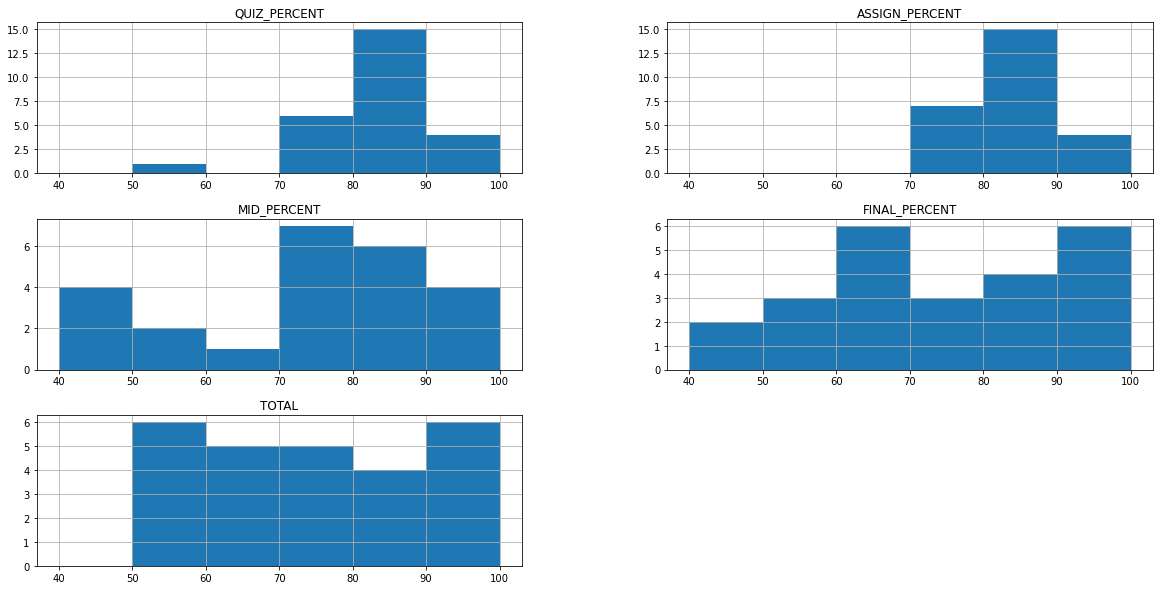

In [56]:
bcs_sp22.hist(column=['QUIZ_PERCENT', 'ASSIGN_PERCENT', 'MID_PERCENT', 'FINAL_PERCENT', 'TOTAL'], figsize=(20, 10), bins=bins)

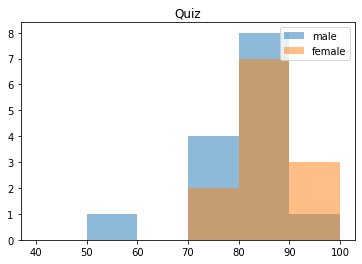

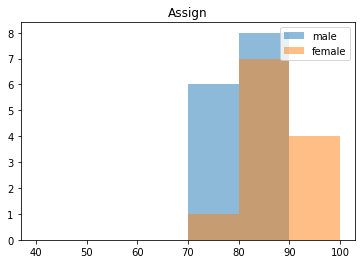

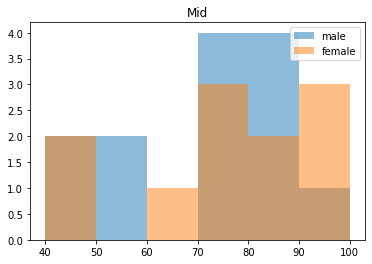

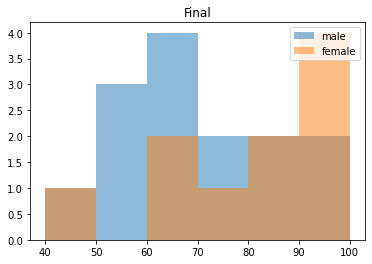

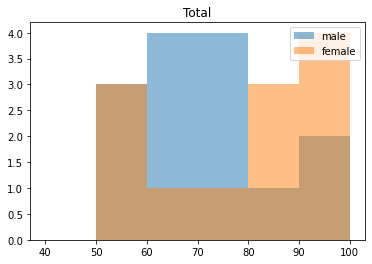

In [57]:
bcs_sp22_m = bcs_sp22[bcs_sp22['GENDER'] == 'M']
bcs_sp22_f = bcs_sp22[bcs_sp22['GENDER'] == 'F']
plt.hist(bcs_sp22_m['QUIZ_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bcs_sp22_f['QUIZ_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Quiz')
plt.legend(loc='upper right')
plt.show()

plt.hist(bcs_sp22_m['ASSIGN_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bcs_sp22_f['ASSIGN_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Assign')
plt.legend(loc='upper right')
plt.show()

plt.hist(bcs_sp22_m['MID_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bcs_sp22_f['MID_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Mid')
plt.legend(loc='upper right')
plt.show()

plt.hist(bcs_sp22_m['FINAL_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bcs_sp22_f['FINAL_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Final')
plt.legend(loc='upper right')
plt.show()

plt.hist(bcs_sp22_m['TOTAL'], bins=bins, alpha=0.5, label='male')
plt.hist(bcs_sp22_f['TOTAL'], bins=bins, alpha=0.5, label='female')
plt.title('Total')
plt.legend(loc='upper right')
plt.show()

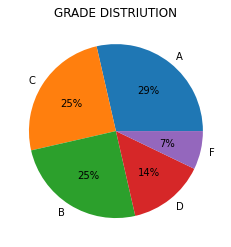

In [58]:
plt.pie(uncleaned_bcs_sp22["LG"].str[0].value_counts(), labels=uncleaned_bcs_sp22["LG"].str[0].value_counts().keys(), autopct='%.0f%%')
plt.title('GRADE DISTRIUTION')
plt.show()


### Data Visualization for BSE FA21
* Histogram
* Frequency Curve
* Multiple Bar Chart
* Component Bar Chart
* Pie Chart

In [59]:
bse_fa21 = all_classes[all_classes['BATCH'] == 'bse_fa21']
uncleaned_bse_fa21 = uncleaned_all_classes[uncleaned_all_classes['BATCH'] == 'bse_fa21']

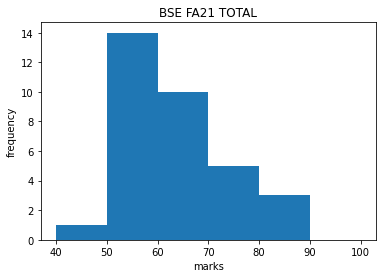

In [60]:
plt.hist(bse_fa21['TOTAL'], bins=bins)
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title("BSE FA21 TOTAL")
plt.xticks(bins)
plt.show()

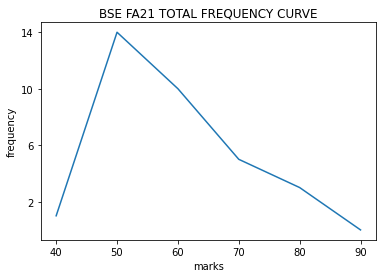

In [64]:
plt.plot(bins[:-1], bse_fa21['TOTAL'].value_counts(bins=bins - 1).sort_index())
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title('BSE FA21 TOTAL FREQUENCY CURVE')
plt.xticks(bins[:-1])
plt.yticks(np.arange(2, 16, 4))
plt.show()

array([[<AxesSubplot:title={'center':'QUIZ_PERCENT'}>,
        <AxesSubplot:title={'center':'ASSIGN_PERCENT'}>],
       [<AxesSubplot:title={'center':'MID_PERCENT'}>,
        <AxesSubplot:title={'center':'FINAL_PERCENT'}>],
       [<AxesSubplot:title={'center':'TOTAL'}>, <AxesSubplot:>]],
      dtype=object)

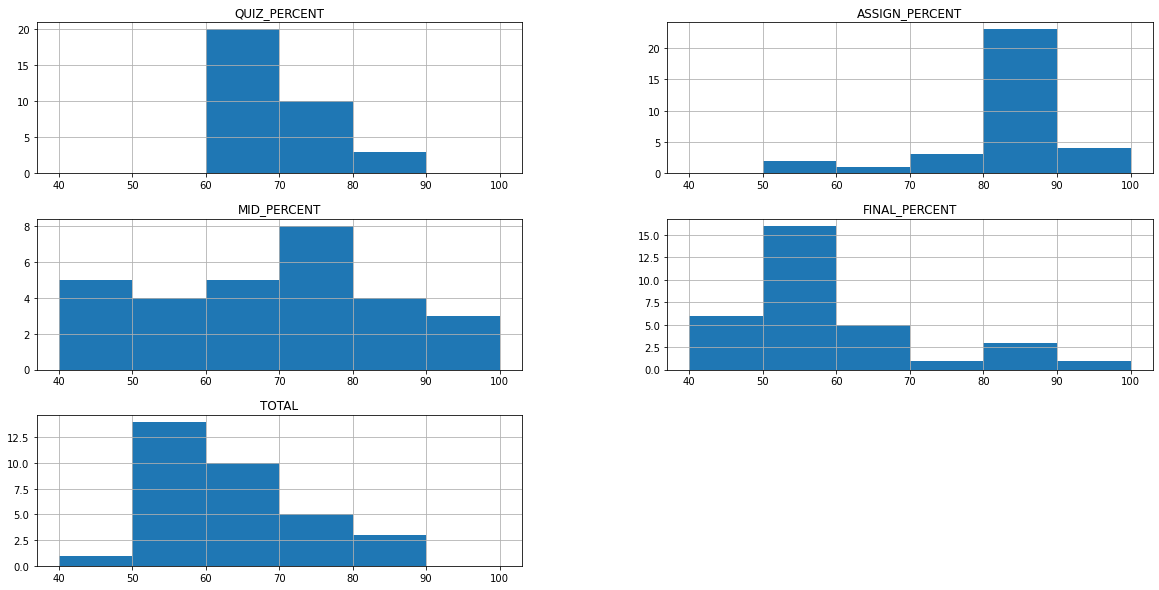

In [65]:
bse_fa21.hist(column=['QUIZ_PERCENT', 'ASSIGN_PERCENT', 'MID_PERCENT', 'FINAL_PERCENT', 'TOTAL'], figsize=(20, 10), bins=bins)

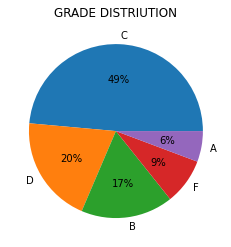

In [66]:
plt.pie(uncleaned_bse_fa21["LG"].str[0].value_counts(), labels=uncleaned_bse_fa21["LG"].str[0].value_counts().keys(), autopct='%.0f%%')
plt.title('GRADE DISTRIUTION')
plt.show()

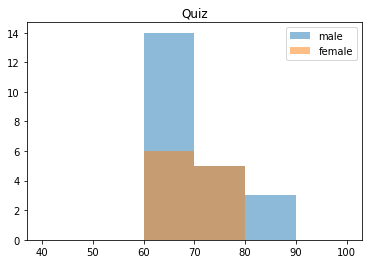

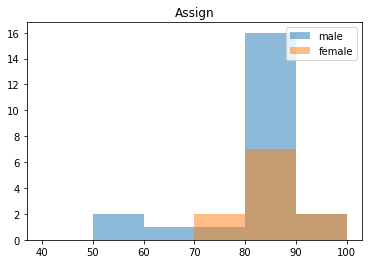

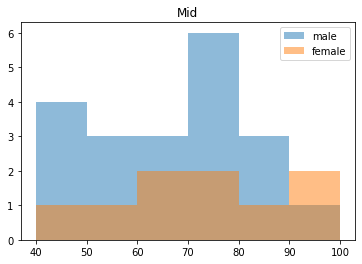

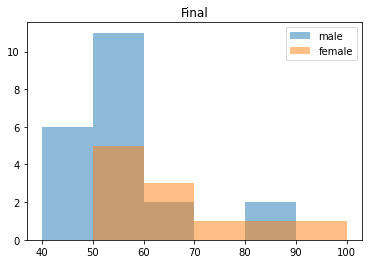

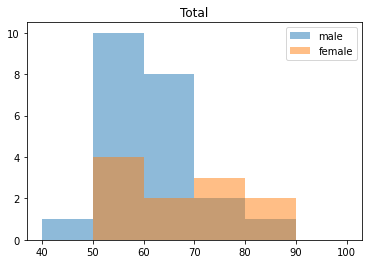

In [67]:
bse_fa21_m = bse_fa21[bse_fa21['GENDER'] == 'M']
bse_fa21_f = bse_fa21[bse_fa21['GENDER'] == 'F']
plt.hist(bse_fa21_m['QUIZ_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bse_fa21_f['QUIZ_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Quiz')
plt.legend(loc='upper right')
plt.show()

plt.hist(bse_fa21_m['ASSIGN_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bse_fa21_f['ASSIGN_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Assign')
plt.legend(loc='upper right')
plt.show()

plt.hist(bse_fa21_m['MID_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bse_fa21_f['MID_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Mid')
plt.legend(loc='upper right')
plt.show()

plt.hist(bse_fa21_m['FINAL_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bse_fa21_f['FINAL_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Final')
plt.legend(loc='upper right')
plt.show()

plt.hist(bse_fa21_m['TOTAL'], bins=bins, alpha=0.5, label='male')
plt.hist(bse_fa21_f['TOTAL'], bins=bins, alpha=0.5, label='female')
plt.title('Total')
plt.legend(loc='upper right')
plt.show()

### Data Visualization for BSE FA22
* Histogram
* Frequency Curve
* Multiple Bar Chart
* Component Bar Chart
* Pie Chart

In [68]:
bse_fa22 = all_classes[all_classes['BATCH'] == 'bse_fa22']
uncleaned_bse_fa22 = uncleaned_all_classes[uncleaned_all_classes['BATCH'] == 'bse_fa22']

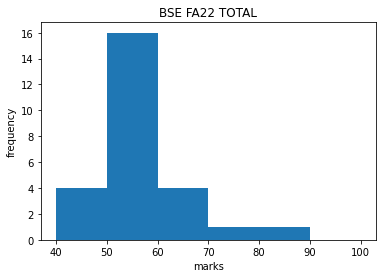

In [69]:
plt.hist(bse_fa22['TOTAL'], bins=bins)
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title("BSE FA22 TOTAL")
plt.xticks(bins)
plt.show()



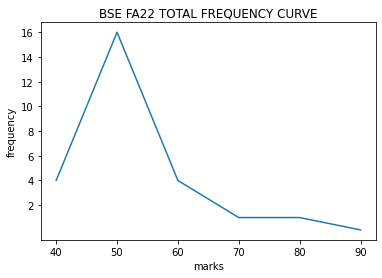

In [72]:
plt.plot(bins[:-1], bse_fa22['TOTAL'].value_counts(bins=bins - 1).sort_index())
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title('BSE FA22 TOTAL FREQUENCY CURVE')
plt.xticks(bins[:-1])
plt.yticks(np.arange(2, 18, 2))
plt.show()

array([[<AxesSubplot:title={'center':'QUIZ_PERCENT'}>,
        <AxesSubplot:title={'center':'ASSIGN_PERCENT'}>],
       [<AxesSubplot:title={'center':'MID_PERCENT'}>,
        <AxesSubplot:title={'center':'FINAL_PERCENT'}>],
       [<AxesSubplot:title={'center':'TOTAL'}>, <AxesSubplot:>]],
      dtype=object)

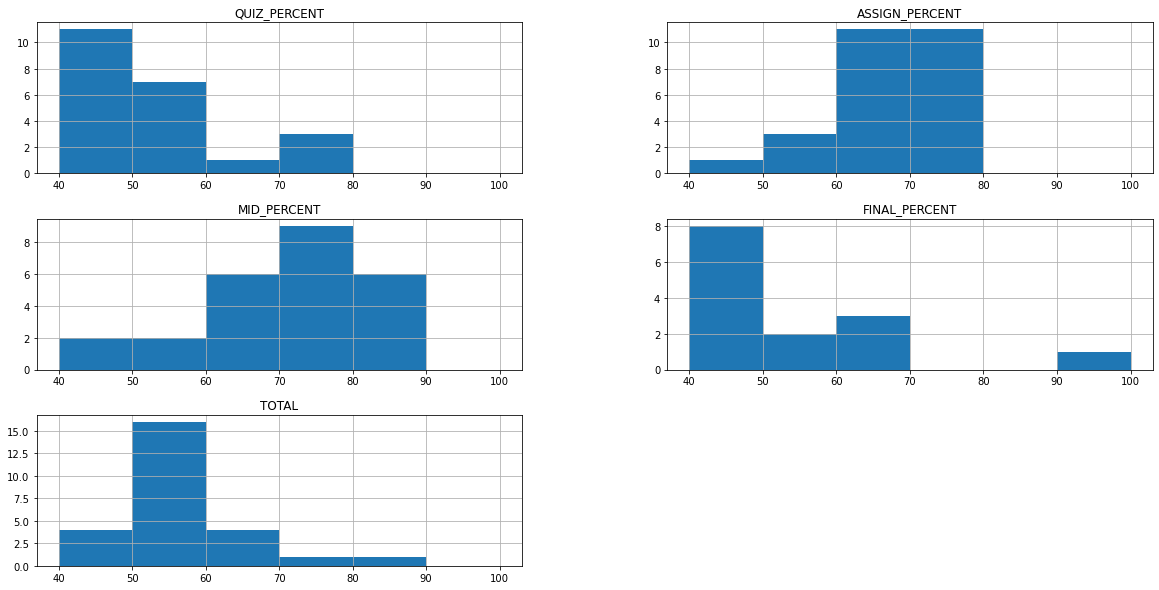

In [74]:
bse_fa22.hist(column=['QUIZ_PERCENT', 'ASSIGN_PERCENT', 'MID_PERCENT', 'FINAL_PERCENT', 'TOTAL'], figsize=(20, 10), bins=bins)

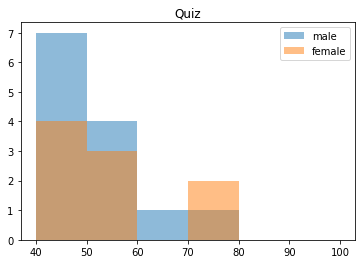

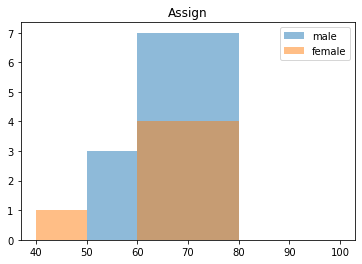

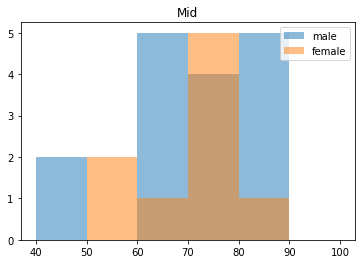

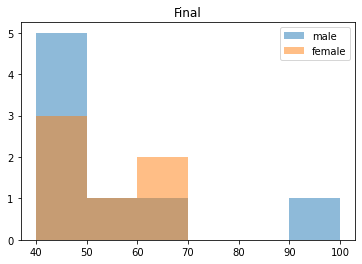

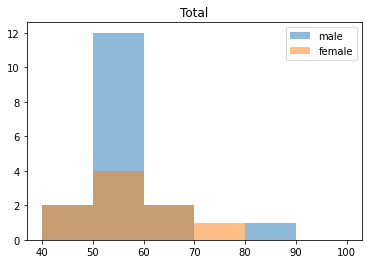

In [75]:
bse_fa22_m = bse_fa22[bse_fa22['GENDER'] == 'M']
bse_fa22_f = bse_fa22[bse_fa22['GENDER'] == 'F']
plt.hist(bse_fa22_m['QUIZ_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bse_fa22_f['QUIZ_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Quiz')
plt.legend(loc='upper right')
plt.show()

plt.hist(bse_fa22_m['ASSIGN_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bse_fa22_f['ASSIGN_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Assign')
plt.legend(loc='upper right')
plt.show()

plt.hist(bse_fa22_m['MID_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bse_fa22_f['MID_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Mid')
plt.legend(loc='upper right')
plt.show()

plt.hist(bse_fa22_m['FINAL_PERCENT'], bins=bins, alpha=0.5, label='male')
plt.hist(bse_fa22_f['FINAL_PERCENT'], bins=bins, alpha=0.5, label='female')
plt.title('Final')
plt.legend(loc='upper right')
plt.show()

plt.hist(bse_fa22_m['TOTAL'], bins=bins, alpha=0.5, label='male')
plt.hist(bse_fa22_f['TOTAL'], bins=bins, alpha=0.5, label='female')
plt.title('Total')
plt.legend(loc='upper right')
plt.show()

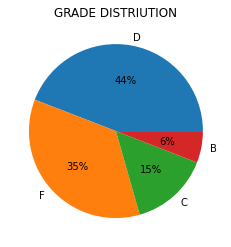

In [76]:
plt.pie(uncleaned_bse_fa22["LG"].str[0].value_counts(), labels=uncleaned_bse_fa22["LG"].str[0].value_counts().keys(), autopct='%.0f%%')
plt.title('GRADE DISTRIUTION')
plt.show()